In [81]:
# Requirements
#!pip install opencv-python-headless ipywidgets
# pip install ipywidgets

In [2]:
import cv2
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import time

ModuleNotFoundError: No module named 'cv2'

In [1]:
# Stop button
# ================
import cv2
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import time

stopButton = widgets.ToggleButton(
    value=False,
    description="Stop",
    disabled=False,
    button_style="danger",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Description",
    icon="square",  # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture("videos/2Persons202403011748.avi")
    display_handle = display(None, display_id=True)
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Stop the loop if there are no frames to read

        # Convert frame to grayscale if needed
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Perform persons detection

        # Encode the frame before displaying it
        _, frame = cv2.imencode(".jpeg", frame)
        display_handle.update(Image(data=frame.tobytes()))
        time.sleep(0.03)  # Uncomment this if you need to control the display speed
        if stopButton.value == True:
            cap.release()
            display_handle.update(None)
            break


# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ModuleNotFoundError: No module named 'cv2'

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

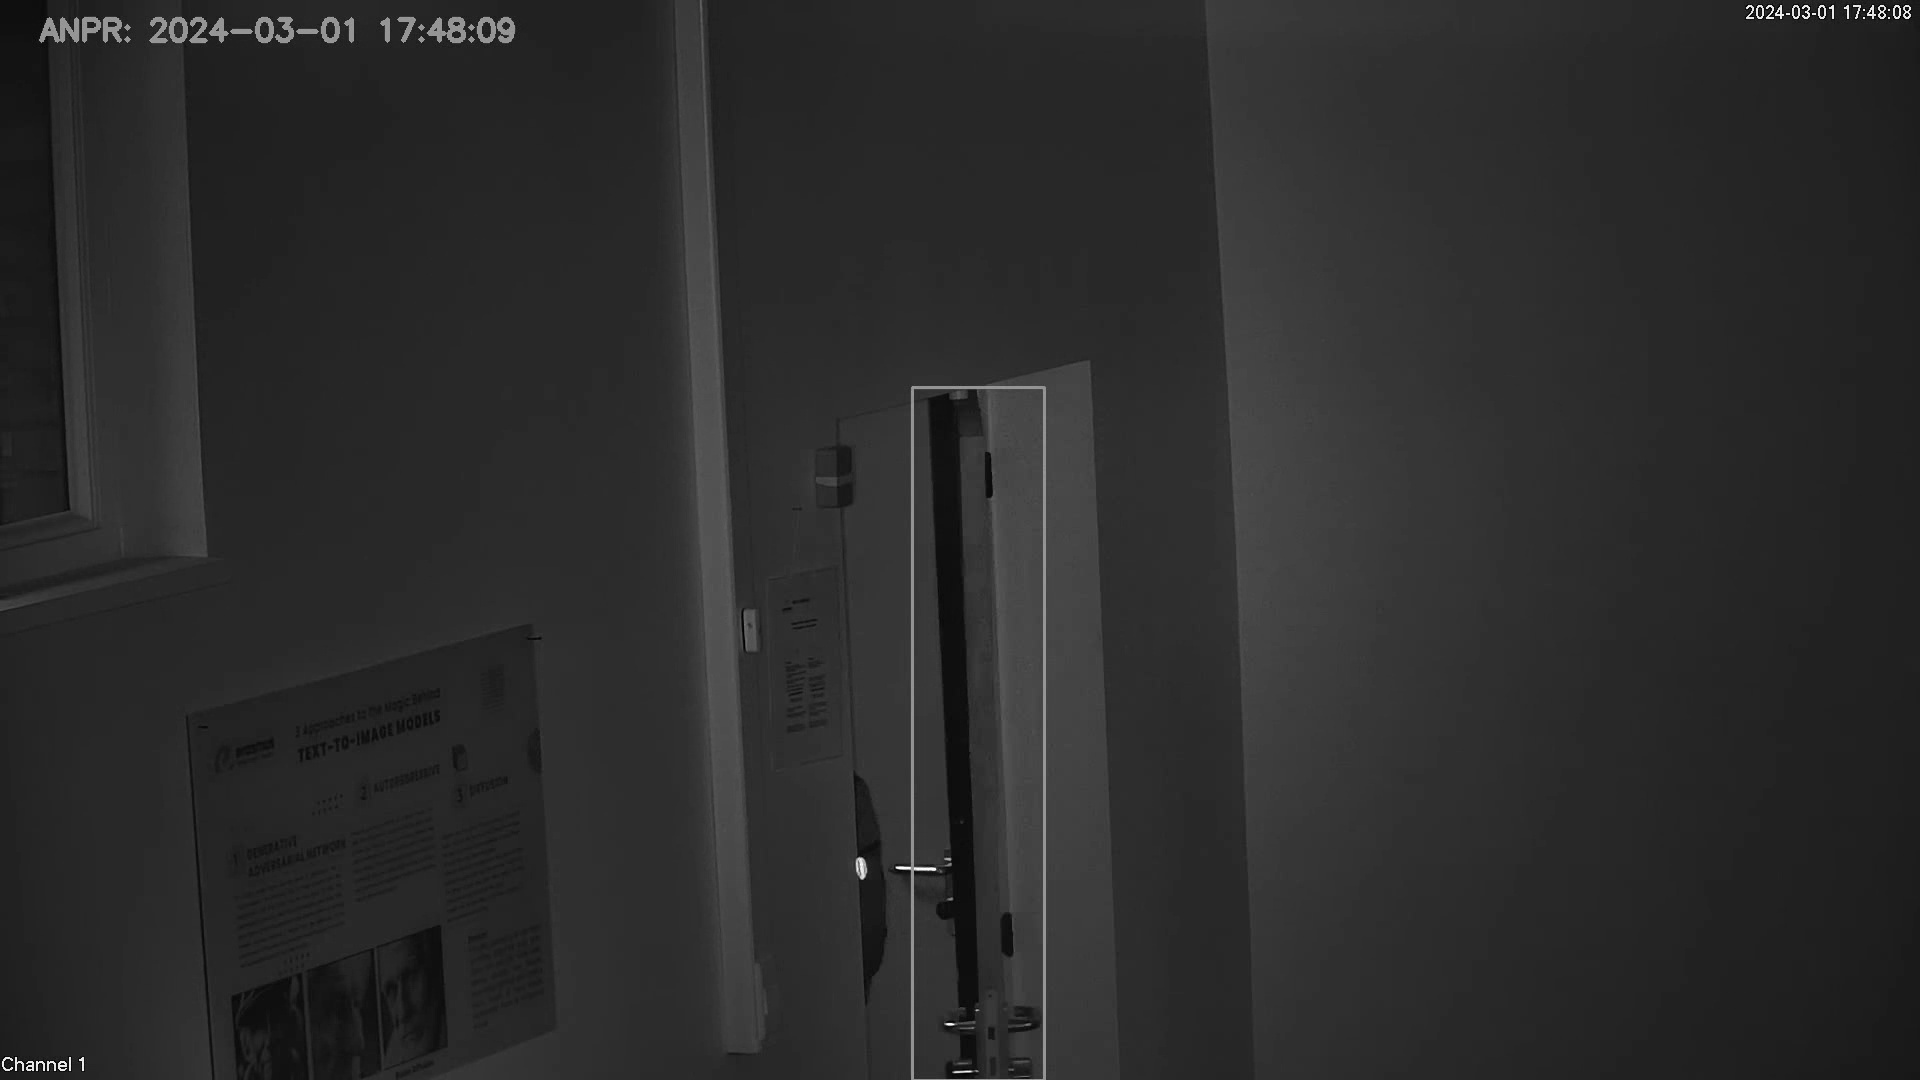

In [84]:
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

In [6]:
import cv2
import os


# Functie om personen in de video te detecteren en kaders toe te voegen
def detect_persons(video_path, output_dir):
    # Initialisatie VideoCapture
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Definitie VideoWriter om de bewerkte video op te slaan
    output_video_path = os.path.join(output_dir, os.path.basename(video_path))
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Haar-cascade-classifier voor personen
    person_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")

    frame_counter = 0
    largest_person_area = 0
    largest_person_frame = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detecteer personen in het frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        persons = person_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Plaats kaders rond de gedetecteerde personen
        for x, y, w, h in persons:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            person_area = w * h
            if person_area > largest_person_area:
                largest_person_area = person_area
                largest_person_frame = frame

        # Schrijf het bewerkte frame naar de output video
        out.write(frame)

        frame_counter += 1

    # Sla het beste beeld op van de gedetecteerde persoon
    if largest_person_frame is not None:
        output_image_path = os.path.join(output_dir, "best_person_image.jpg")
        cv2.imwrite(output_image_path, largest_person_frame)

    # Sluit VideoCapture en VideoWriter
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"Video verwerkt: {video_path}")


# Map voor output
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Lijst van video's
video_files = [f for f in os.listdir("securityCamVideos") if f.endswith(".avi")]

# Verwerk elke video
for video_file in video_files:
    video_path = os.path.join("securityCamVideos", video_file)
    detect_persons(video_path, output_dir)

ModuleNotFoundError: No module named 'cv2'

In [7]:
import cv2
import os


# gelieve een "output" map te maken in de directory om de videos hierin op te slaan (indien deze nog niet aanwezig is), ze worden hier meteen naartoe geschreven


# Functie om personen in de video te detecteren en kaders toe te voegen
def detect_persons(video_path, output_dir):
    # Initialisatie VideoCapture
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Definitie VideoWriter om de bewerkte video op te slaan
    output_video_path = os.path.join(output_dir, os.path.basename(video_path))
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Haar-cascade-classifier voor personen
    person_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")

    frame_counter = 0
    largest_person_area = 0
    largest_person_frame = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detecteer personen in het frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        persons = person_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Plaats kaders rond de gedetecteerde personen
        for x, y, w, h in persons:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            person_area = w * h
            if person_area > largest_person_area:
                largest_person_area = person_area
                largest_person_frame = frame
            cv2.putText(frame, "Person", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Schrijf het bewerkte frame naar de output video
        out.write(frame)

        frame_counter += 1

    # Sla het beste beeld op van de gedetecteerde persoon
    if largest_person_frame is not None:
        output_image_path = os.path.join(output_dir, "best_person_image.jpg")
        cv2.imwrite(output_image_path, largest_person_frame)

    # Sluit VideoCapture en VideoWriter
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"Video verwerkt: {video_path}")


# Map voor output
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Lijst van video's
video_files = [f for f in os.listdir("securityCamVideos") if f.endswith(".avi")]

# Verwerk elke video
for video_file in video_files:
    video_path = os.path.join("securityCamVideos", video_file)
    detect_persons(video_path, output_dir)

# Stop knop
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ModuleNotFoundError: No module named 'cv2'